In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
copper = pd.read_excel("C:\\Users\\User\\Downloads\\Copper_Set.xlsx")

In [3]:
copper

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
#verfiy the number of unquie values in each feature
copper.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [5]:
# checking the datashape and feature
copper.shape

(181673, 14)

In [6]:
# verfiy the datatypes in all features
copper.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [7]:
# check the null values in dataset

copper.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
# converting the datatypes 

copper['quantity tons'] = pd.to_numeric(copper['quantity tons'],errors = 'coerce')
copper['item_date_new']= pd.to_datetime(copper['item_date'],format = '%Y%m%d',errors = 'coerce').dt.date
copper['delivery date_new']= pd.to_datetime(copper['delivery date'],format = '%Y%m%d',errors = 'coerce').dt.date

In [9]:
copper

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_new,delivery date_new
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [10]:
#dropping the irrelavent feature in dataset  

copper.drop(columns=['id','material_ref'], inplace=True)
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_new,delivery date_new
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [11]:
# descriptive stats analaysis
copper.describe().T
     

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [12]:
# checking cat feature

copper['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [13]:
copper['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [14]:
copper.isnull().sum()

item_date             1
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
product_ref           0
delivery date         1
selling_price         1
item_date_new         3
delivery date_new     3
dtype: int64

In [15]:
# handling the null values using mean &mode& median  method
# object datatype using mode
copper['item_date'].fillna(copper['item_date'].mode().iloc[0],inplace = True)
copper['item_date_new'].fillna(copper['item_date_new'].mode().iloc[0],inplace = True)
copper['delivery date'].fillna(copper['delivery date'].mode().iloc[0],inplace = True)
copper['delivery date_new'].fillna(copper['delivery date_new'].mode().iloc[0],inplace = True)
copper['status'].fillna(copper['status'].mode().iloc[0], inplace=True)


In [16]:

#numerical datatype using median

copper['customer'].fillna(copper['customer'].median(), inplace=True)
copper['country'].fillna(copper['country'].median(), inplace=True)
copper['application'].fillna(copper['application'].median(), inplace=True)
copper['thickness'].fillna(copper['thickness'].median(), inplace=True)
copper['selling_price'].fillna(copper['selling_price'].median(), inplace=True)


In [17]:
# final check null values in dataset
copper.isnull().sum()

item_date            0
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
delivery date        0
selling_price        0
item_date_new        0
delivery date_new    0
dtype: int64

In [18]:
copper['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [19]:

copper['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [20]:
# Handle NaN values before mapping
copper['status'].fillna('Unknown', inplace=True)
copper['status'] = copper['status'].map({
    'Lost': 0,
    'Won': 1,
    'Draft': 2,
    'To be approved': 3,
    'Not lost for AM': 4,
    'Wonderful': 5,
    'Revised': 6,
    'Offered': 7,
    'Offerable': 8
})



In [21]:

# convert categorical data into numerical data - using  labelencoder methods
encode = OrdinalEncoder()

copper['item type'] = encode.fit_transform(copper[['item type']])
copper


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_new,delivery date_new
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [22]:
copper['status'].value_counts()

status
1    116012
0     34438
4     19573
6      4276
3      4170
2      3140
7        53
8        10
5         1
Name: count, dtype: int64

# Skewness Handling

In [23]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(copper, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=copper, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=copper, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

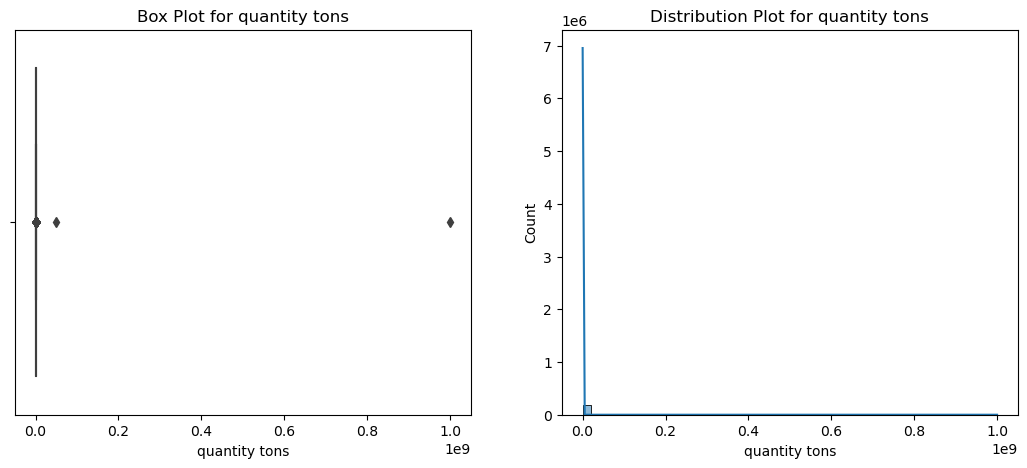

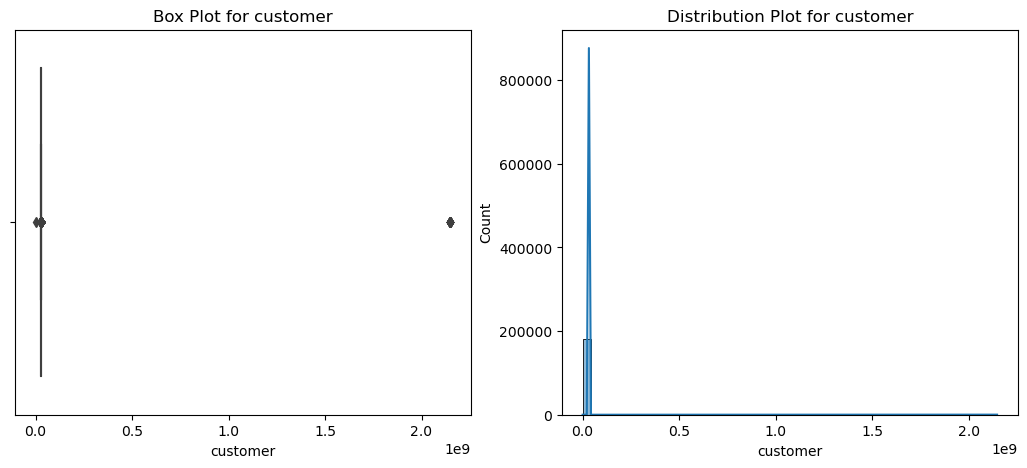

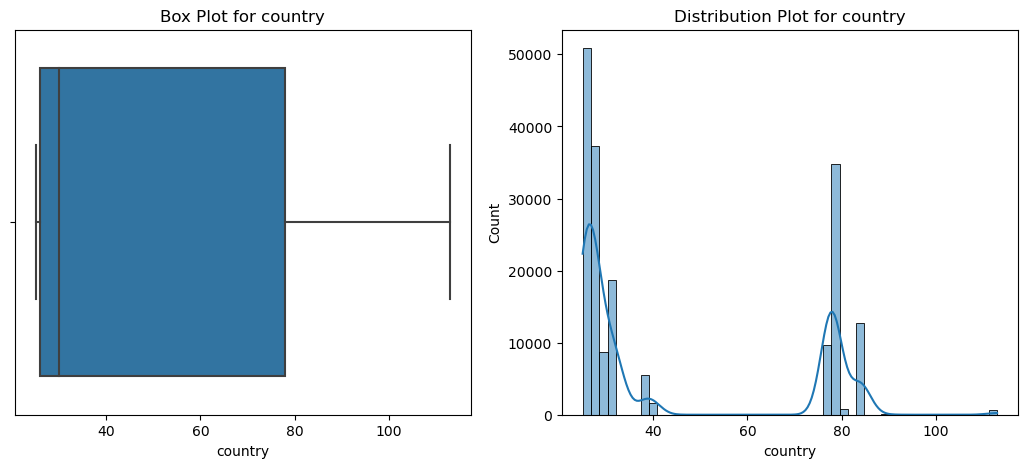

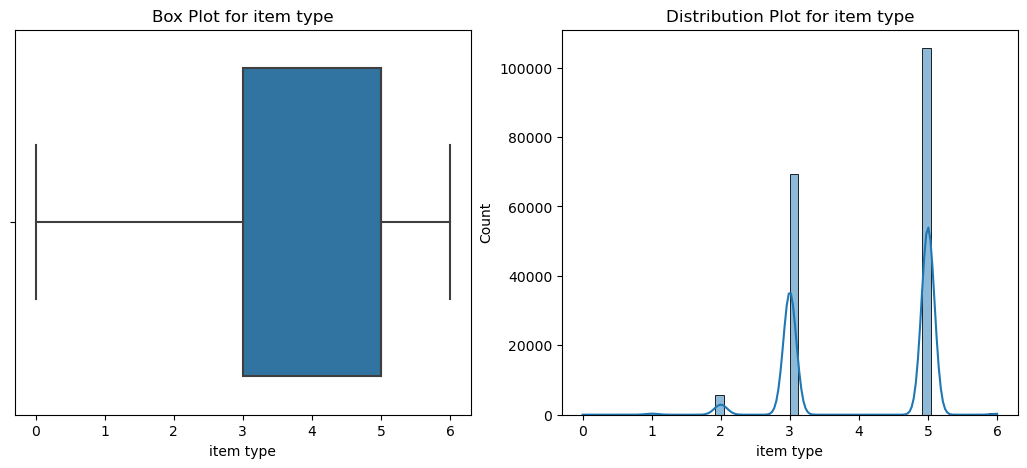

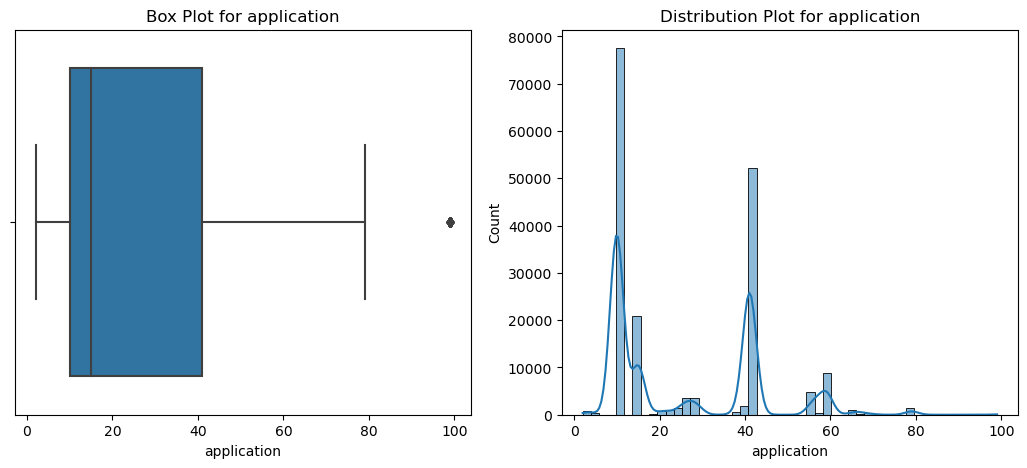

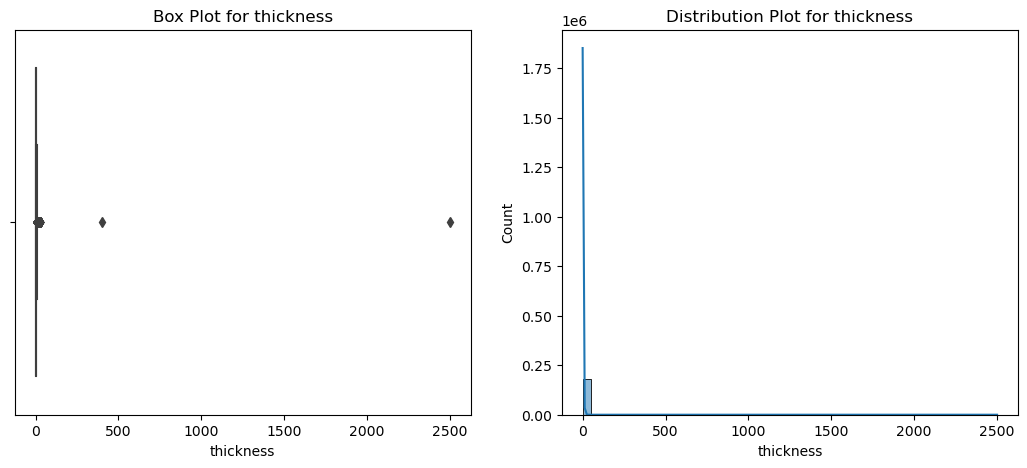

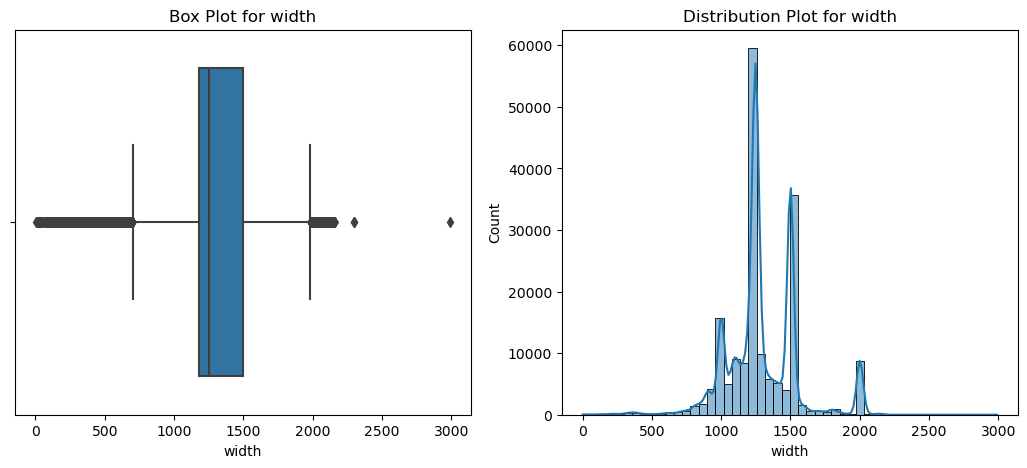

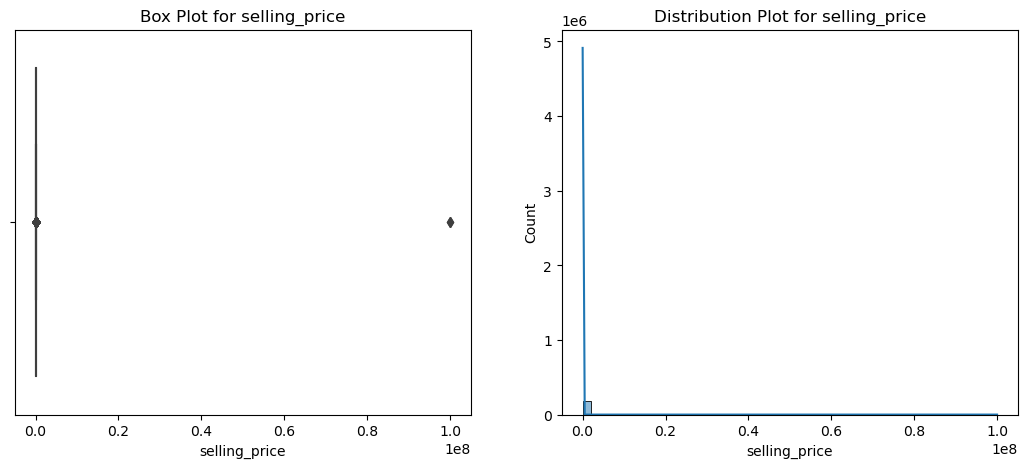

In [24]:

for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(copper, i)
     

In [25]:
 #quantity tons, thickness and selling price this feature are skewd using log method 

copper['quantity tons_log'] = np.log(copper['quantity tons'])
copper['thickness_log'] = np.log(copper['thickness'])
copper['selling_price_log'] = np.log(copper['selling_price'])


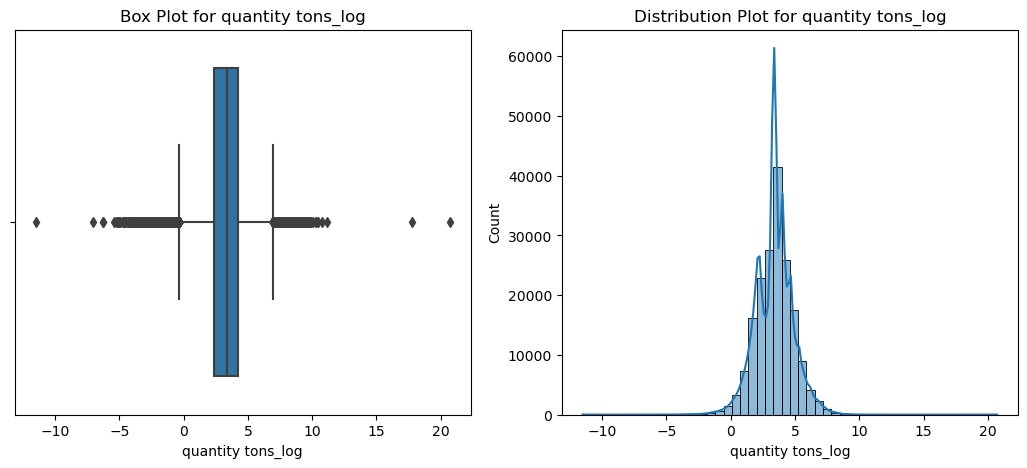

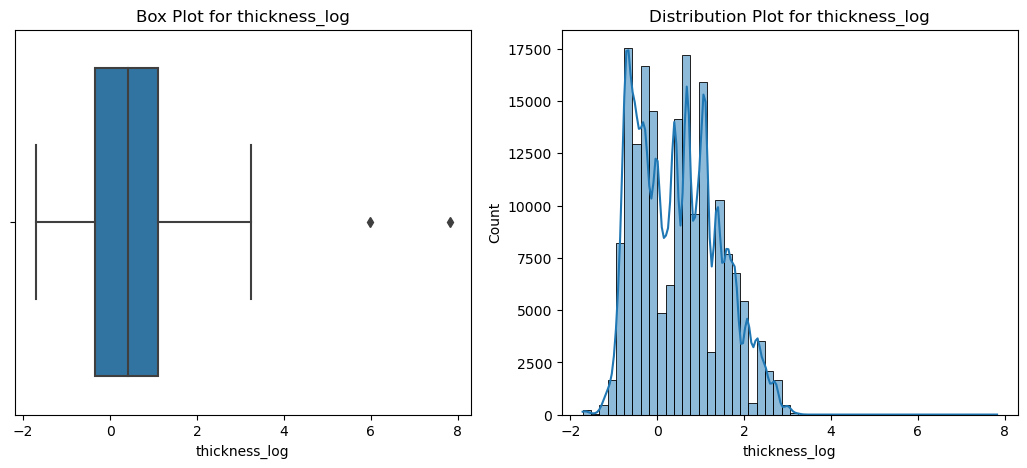

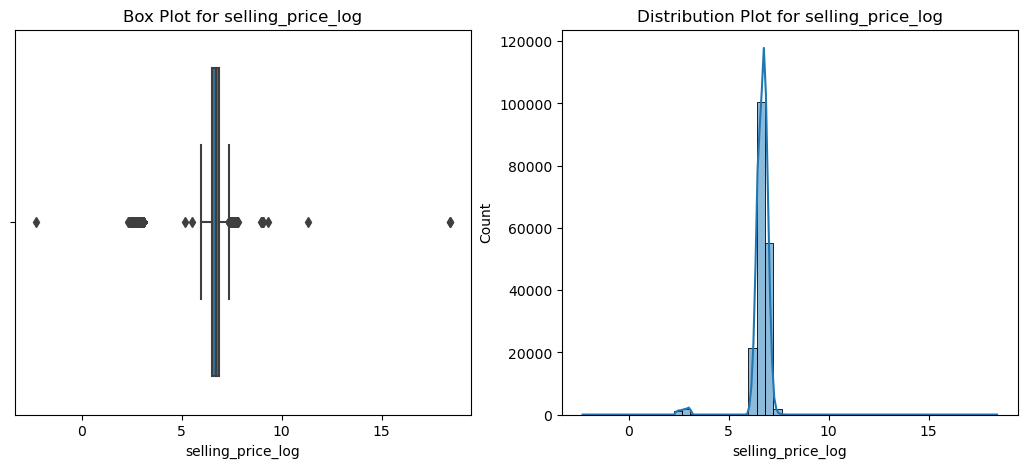

In [26]:
#Try visualizing outliers and skewness before and after treating skewness 

for i in ['quantity tons_log', 'thickness_log', 'selling_price_log']:
    plot(copper,i)

In [27]:
copper_new = copper.copy()
copper_new


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,-2000.000000,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


# Treat Outliers using IQR

In [28]:
#using the IQR & Clips  method removing the outliars :
def outlier(copper_new, column):
    iqr = copper_new[column].quantile(0.75) - copper_new[column].quantile(0.25)
    upper_value = copper_new[column].quantile(0.75) + (1.5*iqr)
    lower_value = copper_new[column].quantile(0.25) - (1.5*iqr)
    copper_new[column] = copper_new[column].clip(lower_value, upper_value)
    
outlier(copper_new, 'quantity tons_log')
outlier(copper_new, 'thickness_log')
outlier(copper_new, 'selling_price_log')
outlier(copper_new, 'width')
copper_new

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,-2000.000000,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


In [29]:
#df =copper_new[(copper_new.thickness_log <lower_value)|(copper_new.thickness_log>upper_value)]

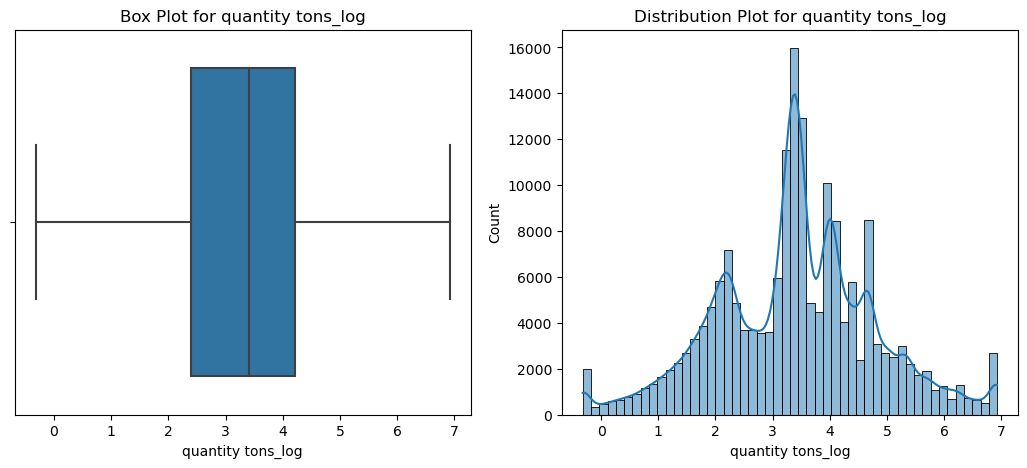

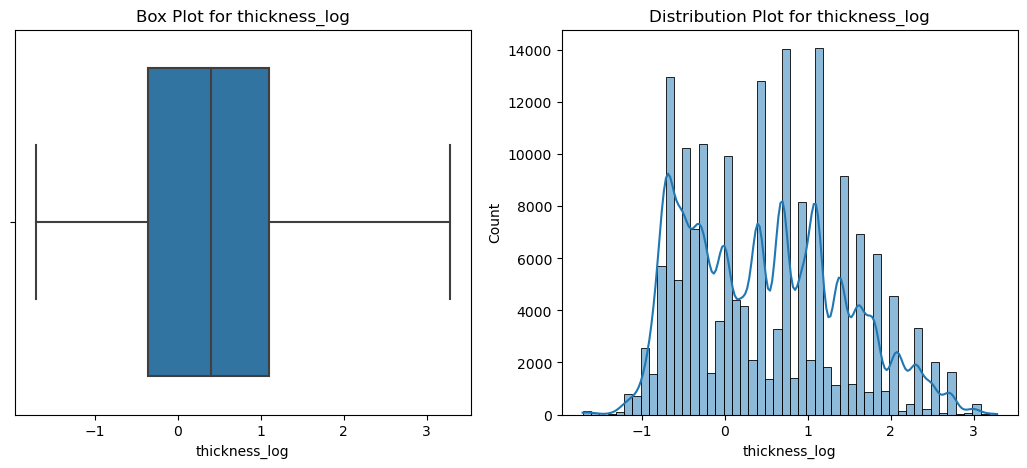

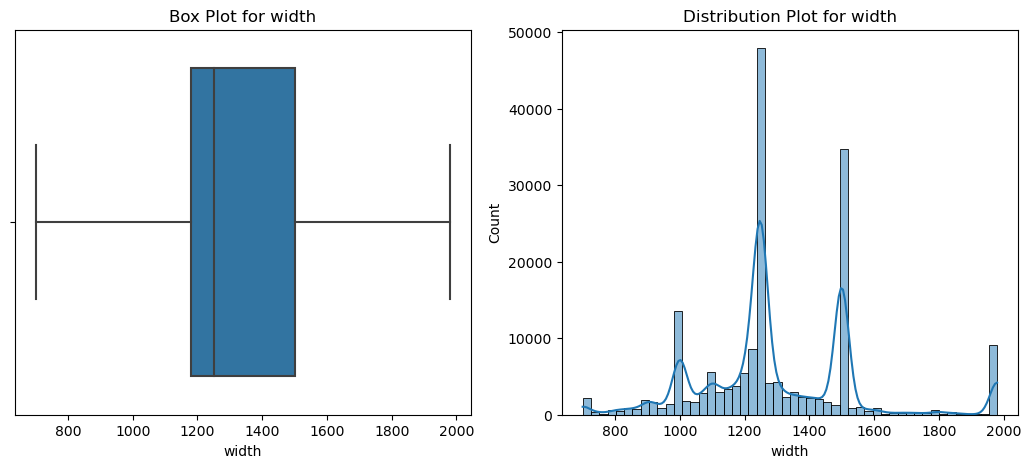

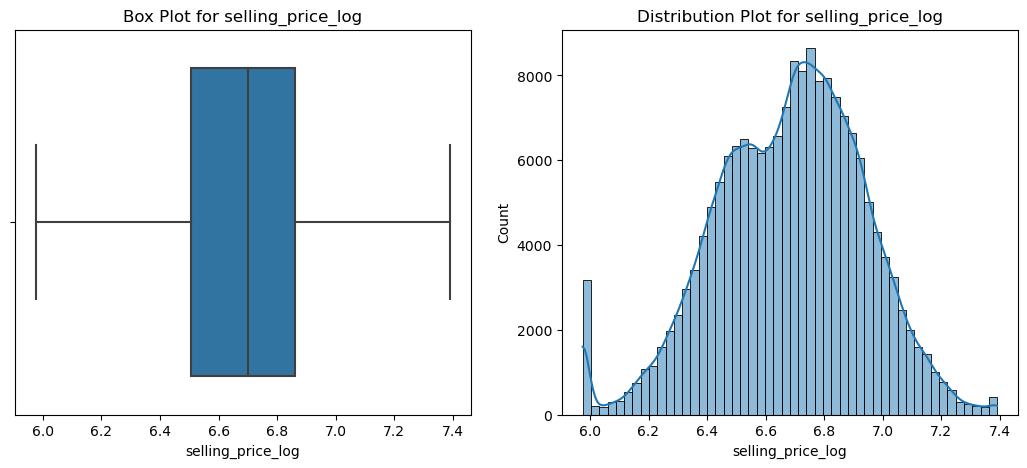

In [30]:
# after IQR method checking outliars using boxplot
for i in ['quantity tons_log', 'thickness_log','width' ,'selling_price_log']:
    plot(copper_new,i)

In [31]:
#dropping the existing feature
copper_new1=copper_new.drop(columns = ['quantity tons', 'thickness', 'selling_price'])
copper_new1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


In [32]:
copper_new1.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_new         object
delivery date_new     object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

<Axes: >

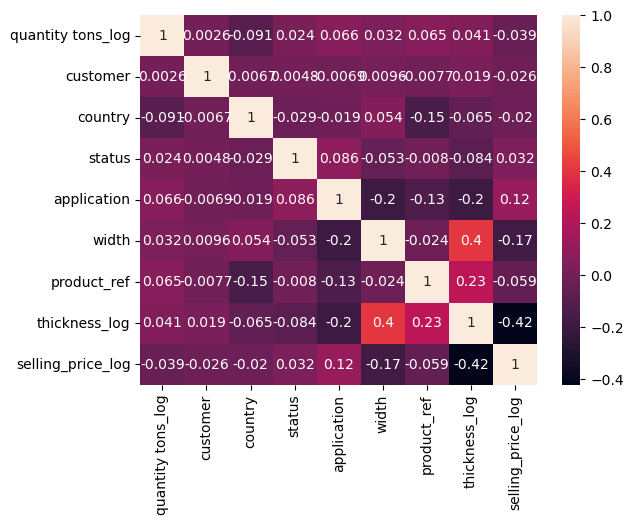

In [33]:
# Need to verify any columns are highly correlated using Heatmap.

heat_feat = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']

heat_feature = copper_new1[heat_feat].corr()

sns.heatmap(heat_feature,annot = True)

In [34]:
copper_new2 = copper_new1.copy()
copper_new2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


# Wrong Delivery Date Handling

In [35]:
copper_new2.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_new         object
delivery date_new     object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [36]:
# converting datatypes item_date_new delivery date_new this features
copper_new2['delivery date_new'] = pd.to_datetime(copper_new2['delivery date_new'], errors='coerce')

copper_new2['item_date_new'] = pd.to_datetime(copper_new2['delivery date_new'], errors='coerce')
  

In [37]:
copper_new2.dtypes

item_date                   float64
customer                    float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_new        datetime64[ns]
delivery date_new    datetime64[ns]
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [39]:

# Assuming copper_new2 already exists and has the structure as mentioned before
copper_new2['item_date_new'] = pd.to_datetime(copper_new2['item_date_new'])

copper_new2['Date_difference'] = (copper_new2['delivery date_new'] - copper_new2['item_date_new']).dt.days

copper_new2


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-07-01,2021-07-01,3.991779,0.693147,6.749931,0
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-01-01,2021-01-01,5.956169,-0.967584,6.468211,0
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-01-01,2021-01-01,5.310301,0.832909,6.643790,0
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-03-01,2021-03-01,6.666354,1.386294,6.357842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-01,2020-07-01,4.629691,-0.040822,6.381816,0
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-01,2020-07-01,5.337954,-0.051293,6.378426,0
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,1.443523,-0.342490,6.428105,0
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,NaN,-0.162519,6.398595,0


In [79]:
# convert the data type using pandas
copper_new2['item_date_new'] = pd.to_datetime(copper_new2['item_date_new'])

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
copper_new2['item_date_day'] = copper_new2['item_date_new'].dt.day
copper_new2['item_date_month'] = copper_new2['item_date_new'].dt.month
copper_new2['item_date_year'] = copper_new2['item_date_new'].dt.year

copper_new2

,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-07-01,2021-07-01,3.991779,0.693147,6.749931,0,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-01-01,2021-01-01,5.956169,-0.967584,6.468211,0,1,1,2021
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-01-01,2021-01-01,5.310301,0.832909,6.643790,0,1,1,2021
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-03-01,2021-03-01,6.666354,1.386294,6.357842,0,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-01,2020-07-01,4.629691,-0.040822,6.381816,0,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-01,2020-07-01,5.337954,-0.051293,6.378426,0,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,1.443523,-0.342490,6.428105,0,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,3.392949,-0.162519,6.398595,0,1,7,2020


In [80]:
print("Unique Dates in 'item_date_new':", copper_new2['item_date_new'].unique())
print("Unique Dates in 'delivery date_new':", copper_new2['delivery date_new'].unique())


Unique Dates in 'item_date_new': <DatetimeArray>
['2021-07-01 00:00:00', '2021-04-01 00:00:00', '2021-01-01 00:00:00',
 '2021-03-01 00:00:00', '2021-06-01 00:00:00', '2021-05-01 00:00:00',
 '2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
 '2021-11-01 00:00:00', '2022-01-01 00:00:00', '2020-07-01 00:00:00',
 '2020-10-01 00:00:00', '2021-02-01 00:00:00', '2019-07-01 00:00:00',
 '2020-08-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2019-04-01 00:00:00', '2020-01-01 00:00:00', '2020-06-01 00:00:00',
 '2020-04-01 00:00:00', '2020-09-01 00:00:00', '2020-05-01 00:00:00',
 '2021-12-01 00:00:00']
Length: 25, dtype: datetime64[ns]
Unique Dates in 'delivery date_new': <DatetimeArray>
['2021-07-01 00:00:00', '2021-04-01 00:00:00', '2021-01-01 00:00:00',
 '2021-03-01 00:00:00', '2021-06-01 00:00:00', '2021-05-01 00:00:00',
 '2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
 '2021-11-01 00:00:00', '2022-01-01 00:00:00', '2020-07-01 00:00:00',


In [81]:
print(copper_new2.dtypes)


customer                    float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_new        datetime64[ns]
delivery date_new    datetime64[ns]
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
Date_difference               int64
item_date_day                 int32
item_date_month               int32
item_date_year                int32
dtype: object


In [43]:
copper_new2.drop('item_date', axis=1, inplace=True)


In [45]:
#copper_new2.isnull().sum()

copper_new2['selling_price_log'].fillna(copper_new2['selling_price_log'].mean(),inplace=True)
copper_new2['quantity tons_log'].fillna(copper_new2['quantity tons_log'].mean(),inplace=True)

In [46]:
copper_new2.isnull().sum()

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_new        0
delivery date_new    0
quantity tons_log    0
thickness_log        0
selling_price_log    0
Date_difference      0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [47]:
copper_new2.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_new', 'delivery date_new',
       'quantity tons_log', 'thickness_log', 'selling_price_log',
       'Date_difference', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [48]:
copper_new2.dtypes

customer                    float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_new        datetime64[ns]
delivery date_new    datetime64[ns]
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
Date_difference               int64
item_date_day                 int32
item_date_month               int32
item_date_year                int32
dtype: object

# Model Building and Evaluation:

1 .Regression Method - predicts continuous variable ‘Selling_Price’. 
2 .Classification Method - Predict Status 

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle


In [88]:
# chooseing the x and y in dataset
X = copper_new2[['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 
       'quantity tons_log', 'thickness_log',
        'item_date_day', 'item_date_month',
       'item_date_year']]
y = copper_new2[['selling_price_log']]
# Data Pre-Processing with Standard scaler  
scaler = StandardScaler()  
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=(0.3),random_state = 42)


In [89]:
len(X_test)

45135

In [90]:
len(X_train)

105315

In [91]:
# fitting the model using RandomForestRegressor 
RFR = RandomForestRegressor() 
RFR = RandomForestRegressor(n_estimators= 50,random_state= 0)
RFR.fit(X_test,y_test)
y_train_pred = RFR.predict(X_train)
y_test_pred =  RFR.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test
     


(0.9384920506438417, 0.9909495472815406)

In [92]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.


In [93]:
# GridsearchCV is a cross validation function
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

param = {'max_depth'        : [20],
              'min_samples_split': [ 5, ],
              'min_samples_leaf' : [ 2, ],
              'max_features'     : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(X_train, y_train)
grid_searchcv.best_score_

0.9441894302210081

In [94]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [95]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
X_train.shape,X_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

(0.9692842072585235, 0.944851031093911)

In [96]:
 # predict the selling price with hypertuning parameters and calculate the accuracy using metrics

X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
X_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 0.0031203790147568433
Mean Absolute Error: 0.03834558221249196
Root Mean Squared Error: 0.0558603527983564
0.9450081157243594


In [97]:
# save the model 
import pickle

with open("C:\\Users\\User\\Downloads\\copper_model_regression_final.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)


In [98]:
# load pickle model to predict the status (like Trained brain).

with open("C:\\Users\\User\\Downloads\\copper_model_regression_final.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30156308.0,25.0,1,5.0,10.0,1500.0,167079877841,3.991779,0.693147,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]


6.797671352703596

# 2 .Classification Method - Predict Status

In [99]:
copper_new2

,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-07-01,2021-07-01,3.991779,0.693147,6.749931,0,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-01-01,2021-01-01,5.956169,-0.967584,6.468211,0,1,1,2021
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-01-01,2021-01-01,5.310301,0.832909,6.643790,0,1,1,2021
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-03-01,2021-03-01,6.666354,1.386294,6.357842,0,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-01,2020-07-01,4.629691,-0.040822,6.381816,0,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-01,2020-07-01,5.337954,-0.051293,6.378426,0,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,1.443523,-0.342490,6.428105,0,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,3.392949,-0.162519,6.398595,0,1,7,2020


In [100]:
# filter the status column values only 7 & 1 rows in a new dataframe ['Won':7 & 'Lost':1]
copper_new2= copper_new2[(copper_new2.status == 0) | (copper_new2.status == 1)]
copper_new2
     

,customer,country,status,item type,application,width,product_ref,delivery date,item_date_new,delivery date_new,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-07-01,2021-07-01,3.991779,0.693147,6.749931,0,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-01-01,2021-01-01,5.956169,-0.967584,6.468211,0,1,1,2021
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-01-01,2021-01-01,5.310301,0.832909,6.643790,0,1,1,2021
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-03-01,2021-03-01,6.666354,1.386294,6.357842,0,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-01,2020-07-01,4.629691,-0.040822,6.381816,0,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-01,2020-07-01,5.337954,-0.051293,6.378426,0,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,1.443523,-0.342490,6.428105,0,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-01,2020-07-01,3.392949,-0.162519,6.398595,0,1,7,2020


In [101]:
copper_new2["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [102]:
copper_new2.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_new', 'delivery date_new',
       'quantity tons_log', 'thickness_log', 'selling_price_log',
       'Date_difference', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pickle

In [104]:
X = copper_new2[['customer', 'country', 'item type', 'application', 'width',
       'product_ref',
       'quantity tons_log', 'thickness_log','selling_price_log',
        'item_date_day', 'item_date_month',
       'item_date_year']]
y = copper_new2[['status']]


encode = StandardScaler()
encode.fit_transform(X)



array([[-0.01256427, -0.71016603,  0.76983752, ...,  0.        ,
         0.37675436,  0.69841068],
       [-0.00763246, -0.83267579,  0.76983752, ...,  0.        ,
        -0.50012565,  0.69841068],
       [-0.01281229, -0.62849286,  1.72299563, ...,  0.        ,
        -1.37700566,  0.69841068],
       ...,
       [-0.00785288, -0.83267579,  0.76983752, ...,  0.        ,
         0.37675436, -1.43104552],
       [-0.00785288, -0.83267579,  0.76983752, ...,  0.        ,
         0.37675436, -1.43104552],
       [-0.00785288, -0.83267579,  0.76983752, ...,  0.        ,
         0.37675436, -1.43104552]])

In [105]:
X.shape,y.shape

((150450, 12), (150450, 1))

In [106]:
# check the accuracy of training and testing using metric  LogisticRegression alogorithm 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

Log =LogisticRegression()



Log.fit(X_train,y_train)

y_pred_train = Log.predict(X_train)
y_pred_test= Log.predict(X_test)

accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
accuracy_test = metrics.accuracy_score(y_test,y_pred_test) 
accuracy_train,accuracy_test

(0.7717264872050515, 0.7685942173479561)

In [107]:
len(X_train)

120360

In [108]:
len(X_test)

30090

In [109]:
# check the accuracy of training and testing using metric  DecisionTreeClassifie alogorithm 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

DTC = DecisionTreeClassifier()

DTC = DecisionTreeClassifier(criterion = 'gini',max_depth=5)

DTC.fit(X_train,y_train)

y_pred_train = DTC.predict(X_train)
y_pred_test= DTC.predict(X_test)

accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
accuracy_test = metrics.accuracy_score(y_test,y_pred_test) 
accuracy_train,accuracy_test

(0.8151213027583915, 0.810601528747092)

In [110]:
# check the accuracy of training and testing using metric  RandomForestClassifier alogorithm 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

RFR =RandomForestClassifier()

RFR =RandomForestClassifier(n_estimators = 50 , random_state = 0)

RFR.fit(X_train,y_train)

y_pred_train = RFR.predict(X_train)
y_pred_test= RFR.predict(X_test)

accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
accuracy_test = metrics.accuracy_score(y_test,y_pred_test) 
accuracy_train,accuracy_test

(0.999950149551346, 0.9480890661349285)

In [111]:
# DecisionTreeClassifierTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.

In [112]:
# GridsearchCV is a cross validation function
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9910518444666002, 0.9445330674642738)

In [113]:

# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [114]:

# predict the status and check the accuracy using metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))
     

[[ 5899  1064]
 [  668 22459]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      6963
           1       0.95      0.97      0.96     23127

    accuracy                           0.94     30090
   macro avg       0.93      0.91      0.92     30090
weighted avg       0.94      0.94      0.94     30090



In [115]:

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9091541568783962


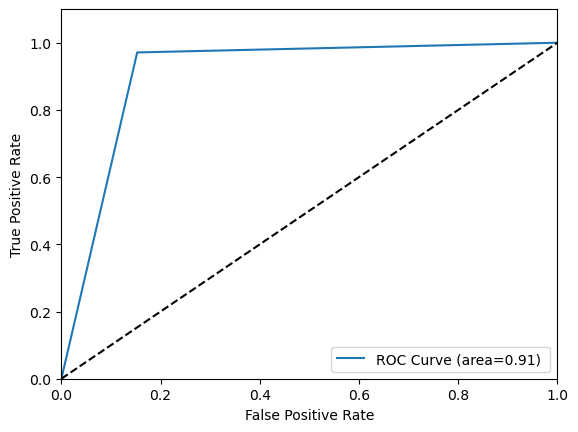

In [116]:

plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
     

In [119]:
#manually passed the user input and predict the status

user_data = np.array([[30156308.0,25.0,5.0,10.0,1500.0,167079877841,3.991779,0.693147,6.749931,1,4,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [120]:
#save the classification model by using pickle

import pickle

with open("C:\\Users\\User\\Downloads\\copper_model_class_final.pkl", 'wb') as f:
    pickle.dump(model, f)


In [122]:
# load pickle model to predict the status (like Trained brain).

with open("C:\\Users\\User\\Downloads\\copper_model_class_final.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30156308.0,25.0,5.0,10.0,1500.0,167079877841,3.991779,0.693147,6.749931,1,4,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won
